In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │       785,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                 epochs = 11, batch_size = 64, verbose=1)
print('Fit time:', time.time() - start_time)

Epoch 1/11


I0000 00:00:1715309836.741485  139327 service.cc:145] XLA service 0x71e920006910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715309836.741507  139327 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-05-10 11:57:16.754688: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-10 11:57:16.814329: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


115/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7772 - loss: 0.7633

I0000 00:00:1715309837.284234  139327 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9014 - loss: 0.3391 - val_accuracy: 0.9720 - val_loss: 0.1014
Epoch 2/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9750 - loss: 0.0830 - val_accuracy: 0.9771 - val_loss: 0.0757
Epoch 3/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9854 - loss: 0.0480 - val_accuracy: 0.9767 - val_loss: 0.0790
Epoch 4/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9896 - loss: 0.0331 - val_accuracy: 0.9803 - val_loss: 0.0642
Epoch 5/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9940 - loss: 0.0206 - val_accuracy: 0.9789 - val_loss: 0.0715
Epoch 6/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9944 - loss: 0.0182 - val_accuracy: 0.9776 - val_loss: 0.0707
Epoch 7/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9952 - loss: 0.0142 - val_accuracy: 0.9829 - val_loss: 0.0609
Epoch 8/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9971 - loss: 0.0092 - val_accuracy: 0.9804 - val_

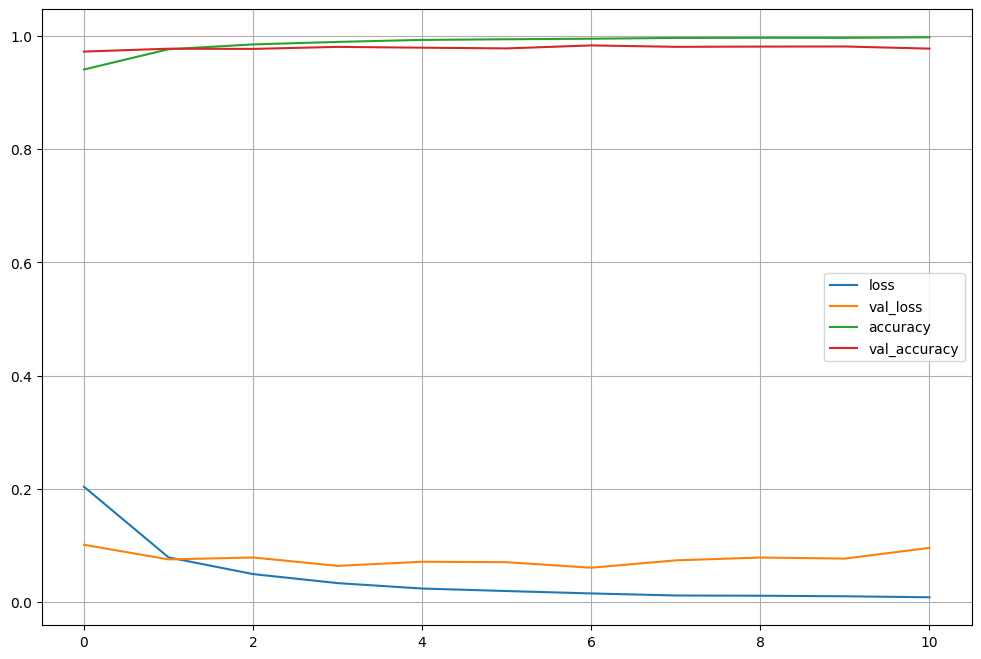

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [16]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy: ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.9739 - loss: 0.1120
Test loss: 0.09596861898899078
Test accuracy:  0.9771999716758728


In [17]:
import numpy as np
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [18]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [19]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

228

In [20]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[900,
 3005,
 9811,
 5676,
 1226,
 2098,
 1554,
 3073,
 3451,
 7800,
 8408,
 1395,
 4201,
 1717,
 3005,
 4382]

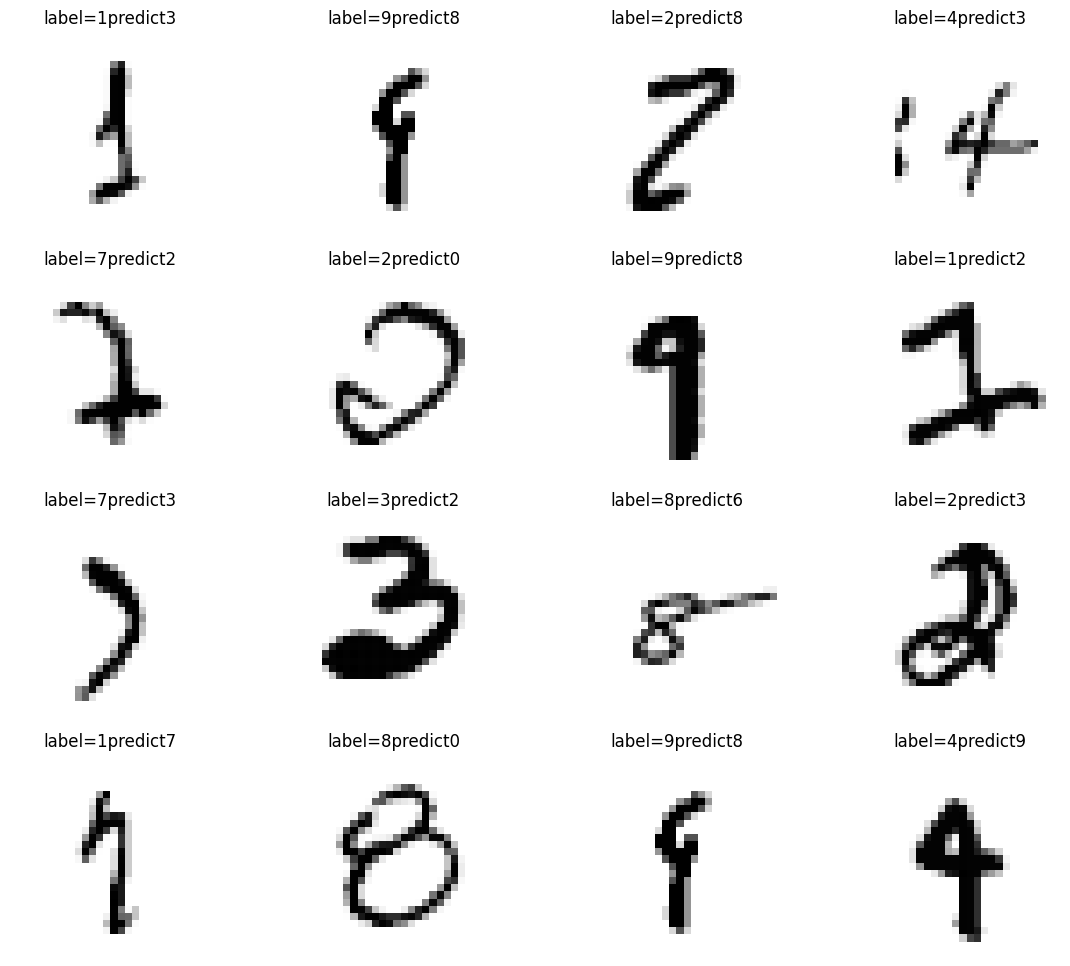

In [22]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4,4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('label=' + str(y_test[n]) + 'predict' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()